In [2]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 495.5 kB/s eta 0:03:22
   ---------------------------------------- 0.1/99.8 MB 1.2 MB/s eta 0:01:22
   ---------------------------------------- 0.3/99.8 MB 1.7 MB/s eta 0:00:59
   ---------------------------------------- 0.4/99.8 MB 2.1 MB/s eta 0:00:47
   ---------------------------------------- 0.6/99.8 MB 2.5 MB/s eta 0:00:41
   ---------------------------------------- 0.8/99.8 MB 2.7 MB/s eta 0:00:37
   ---------------------------------------- 1.0/99.8 MB 2.9 MB/s eta 0:00:35
   ---------------------------------------- 1.2/99.8 MB 3.0 MB/s eta 0:00:34
    ---------------------------------

In [25]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import xgboost as xgb 
import pickle 

In [22]:
data_frame = pd.read_csv('data_cleaned.csv')

# encoding risk level 
label_enc = LabelEncoder()
data_frame['RiskLevel'] = label_enc.fit_transform(data_frame['RiskLevel'])

# separating features from target variable 
X = data_frame[['SystolicBP', 'DiastolicBP', 'HeartRate', 'Age', 'BS']]
y = data_frame['RiskLevel']

# splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

   high risk       0.85      0.87      0.86        47
    low risk       0.87      0.82      0.85        80
    mid risk       0.81      0.84      0.83        76

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.85       203
weighted avg       0.84      0.84      0.84       203



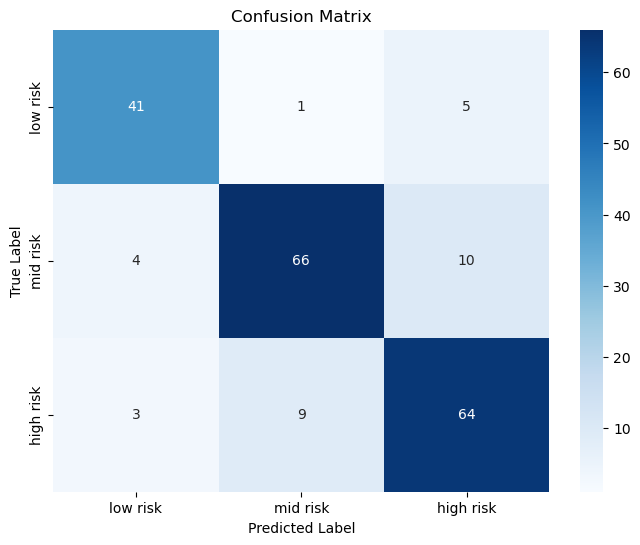

In [29]:
# XGBoost Classifier 
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(data_frame['RiskLevel'].unique()), random_state=42)

# training the model 
xgb_model.fit(X_train, y_train) 

# save model as pickle file 
with open('xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(xgb_model, model_file)

with open('label_encoder_xgb.pkl', 'wb') as le_file:
    pickle.dump(label_enc, le_file)

# predictions
y_pred = xgb_model.predict(X_test)

# converting risk levels back to categorical values 
y_pred_original = label_enc.inverse_transform(y_pred)
y_test_original = label_enc.inverse_transform(y_test)

# check accuracy 
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:")
print(classification_report(y_test_original, y_pred_original))

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)

class_order = ['low risk', 'mid risk', 'high risk']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_order, yticklabels=class_order)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [30]:
with open('xgboost_model.pkl', 'rb') as model_file:
    xgb_model = pickle.load(model_file)

with open('label_encoder_xgb.pkl', 'rb') as le_file:
    label_enc_xgb = pickle.load(le_file)